# Instalasi Library yang Diperlukan
Jalankan perintah berikut untuk menginstal library yang diperlukan:

In [75]:
!pip install tensorflow pandas numpy scikit-learn matplotlib seaborn

SyntaxError: invalid syntax (<ipython-input-75-c8af42657f4a>, line 2)

# Import Library untuk Proyek Machine Learning

Penjelasan:
1. numpy: Digunakan untuk operasi matematis pada array dan matriks.
2. pandas: Digunakan untuk manipulasi dan analisis data dalam format tabel (dataframe).
3. train_test_split (sklearn): Membagi dataset menjadi data latih dan data uji.
4. StandardScaler (sklearn): Menstandarkan fitur dengan menghilangkan mean dan menskalakan ke unit varians.
5. LabelEncoder (sklearn): Mengubah label kategori menjadi angka.
6. tensorflow: Framework untuk membangun dan melatih model deep learning.
7. Sequential (tensorflow.keras): Model berlapis sederhana untuk neural network.
8. Dense, Dropout (tensorflow.keras.layers): Layer dalam neural network. Dense layer adalah layer fully connected, sedangkan Dropout digunakan untuk mengurangi overfitting.
9. Adam (tensorflow.keras.optimizers): Optimizer untuk menyesuaikan bobot neural network.
10. seaborn: Library untuk visualisasi data.
11. matplotlib.pyplot: Library dasar untuk membuat grafik dan visualisasi data.

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat Dataset dari Google Colab

In [50]:
# Load dataset dari Google Colab
from google.colab import files
uploaded = files.upload()  # Upload file F1DriversDataset.csv

# Membaca dataset
data = pd.read_csv('F1DriversDataset.csv')

# Tampilkan beberapa baris data
data.head()

Saving F1DriversDataset.csv to F1DriversDataset (4).csv


,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


# Cek Tipe Data

In [48]:
data.dtypes

,0
Driver,object
Nationality,object
Seasons,object
Championships,float64
Race_Entries,float64
Race_Starts,float64
Pole_Positions,float64
Race_Wins,float64
Podiums,float64
Fastest_Laps,float64


# Preprocessing Dataset dengan cara cek Missing Values, Encoding, dan Normalisasi

In [65]:
# Cek missing values
data.isnull().sum()

# Jika ada nilai yang hilang, kita bisa menghapus atau mengisinya (imputation)
data.dropna(inplace=True)  # Menghapus baris dengan missing values

# Encoding untuk kolom kategorikal
le = LabelEncoder()
data['Nationality'] = le.fit_transform(data['Nationality'])
data['Champion'] = le.fit_transform(data['Champion'])

# Ubah kolom 'Seasons' menjadi numerik, menangani representasi string dari daftar
def convert_to_numeric(seasons_str):
    try:
        return float(seasons_str)  # Jika sudah dalam bentuk numerik
    except ValueError:
        # Jika representasi string dari sebuah daftar, ambil elemen pertama
        import ast
        seasons_list = ast.literal_eval(seasons_str)
        return float(seasons_list[0]) if seasons_list else np.nan  # Jika tidak kosong, ambil elemen pertama, jika tidak, gunakan NaN

data['Seasons'] = data['Seasons'].apply(convert_to_numeric)

# Normalisasi kolom numerik
scaler = StandardScaler()
numerical_cols = ['Seasons', 'Race_Entries', 'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Tampilkan dataset setelah preprocessing
data.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,123,21,-0.454751,0.0,-0.500790,-0.524064,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,0
1,290,42,-1.021809,0.0,-0.519395,-0.486218,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,0
2,505,42,0.627814,0.0,-0.370556,-0.467295,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,0
3,42,21,-0.145447,0.0,0.113173,0.043623,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,0
4,689,3,1.194873,0.0,-0.519395,-0.486218,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,0


# Membangun Model Deep Learning dengan Keras

In [66]:
# Membangun model Sequential
model = Sequential()

# Layer input
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Layer hidden dengan dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Layer output
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tampilkan arsitektur model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

# Proses Encoding Kolom Kategorikal dengan LabelEncoder

In [68]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Label Encoder
le = LabelEncoder()

# Daftar kolom kategorikal yang akan di-encode
categorical_columns = ['Driver', 'Championship Years']

# Lakukan encoding untuk kolom kategorikal
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Tampilkan dataset yang sudah di-encode
data.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,123,21,-0.454751,0.0,-0.500790,-0.524064,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,0
1,290,42,-1.021809,0.0,-0.519395,-0.486218,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,0
2,505,42,0.627814,0.0,-0.370556,-0.467295,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,0
3,42,21,-0.145447,0.0,0.113173,0.043623,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,0
4,689,3,1.194873,0.0,-0.519395,-0.486218,-0.196133,-0.192303,-0.260453,-0.233161,...,34,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,0


## Pemisahan Fitur dan Label serta Pembagian Data Menjadi Train dan Test


In [69]:
# Pisahkan fitur dan label
X = data.drop(columns=['Champion'])  # 'Champion' sebagai target
y = data['Champion']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pelatihan Model

In [70]:
# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6084 - loss: 57.9959 - val_accuracy: 0.9784 - val_loss: 6.5862
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9259 - loss: 16.5911 - val_accuracy: 0.9784 - val_loss: 4.9274
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9288 - loss: 13.4153 - val_accuracy: 0.9856 - val_loss: 2.5391
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 8.7970 - val_accuracy: 0.9856 - val_loss: 1.0815
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9147 - loss: 4.5391 - val_accuracy: 0.9856 - val_loss: 0.3916
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9211 - loss: 2.2655 - val_accuracy: 0.9856 - val_loss: 0.0929
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9076 - loss: 2.2787 - val_accuracy: 0.9856 - val_loss: 0.0857
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9195 - loss: 1.8289 - val_accuracy: 0.9856 - val_l

## Evaluasi Model

In [73]:
# Evaluasi model pada dataset testing
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy on testing set: {accuracy * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9571 - loss: 0.0965 
Accuracy on testing set: 95.98%


## Visualisasi Hasil Model

### Kode untuk Menggambar Akurasi dan Loss:

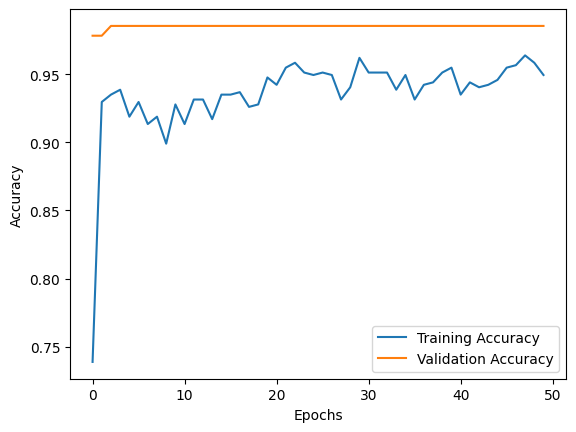

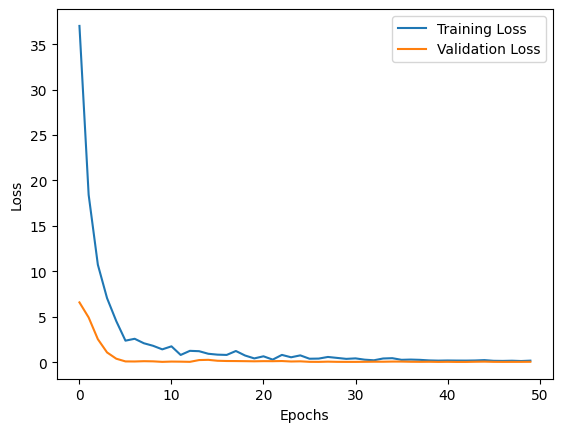

In [74]:
# Plot akurasi training dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss training dan validasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()